# Very Simple Regression

## 1) IMPORT LIBRARIES AND DATASETS

In [1]:
# Import Pkgs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the csv file
salary_df = pd.read_csv('salary.csv')

In [3]:
salary_df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [4]:
salary_df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [5]:
salary_df.tail(8)

,YearsExperience,Salary
27,9.6,112635
28,10.3,122391
29,10.5,121872
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [6]:

# Check the minimun salary
salary_df['Salary'].min()

np.int64(37731)

## 2) Exploratory Data Analysis (EDA) and Visualizations

In [7]:
# check if there are any Null values
salary_df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
# Check the dataframe info
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 692.0 bytes


In [9]:
# Statistical summary of the dataframe
salary_df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [10]:
# number of years of experience corresponding to employees with maximim salary
max = salary_df[salary_df['Salary'] == salary_df['Salary'].max()]

In [11]:
max

,YearsExperience,Salary
34,13.5,139465


In [12]:
# number of years of experience corresponding to employees with minimum salary
min = salary_df[salary_df['Salary'] == salary_df['Salary'].min()]

In [13]:
min

,YearsExperience,Salary
2,1.5,37731


array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

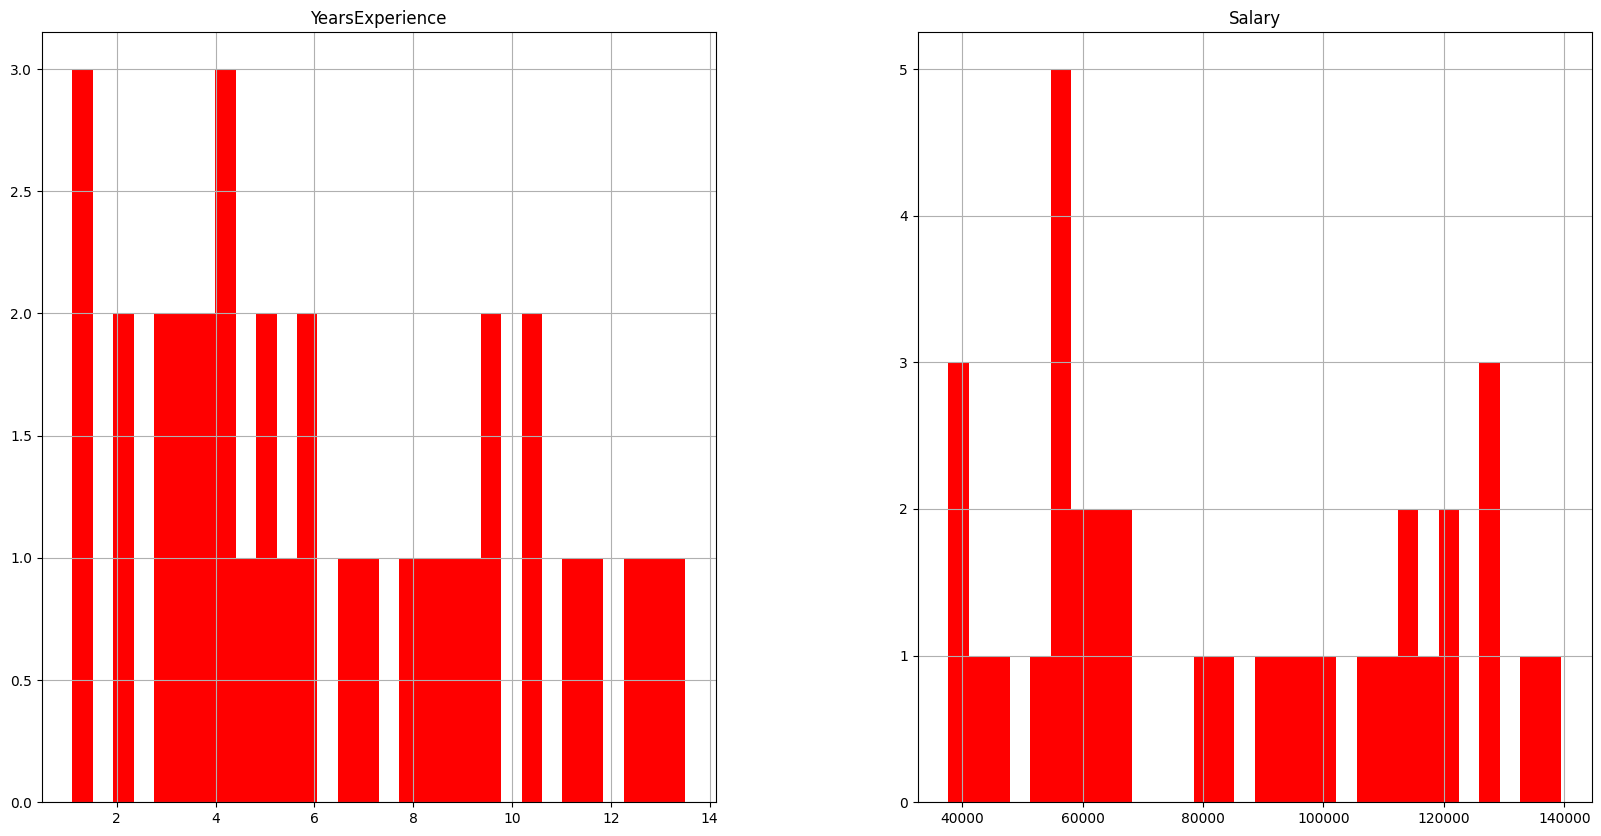

In [14]:
# Histogram Plotting (Data Distribution)
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')

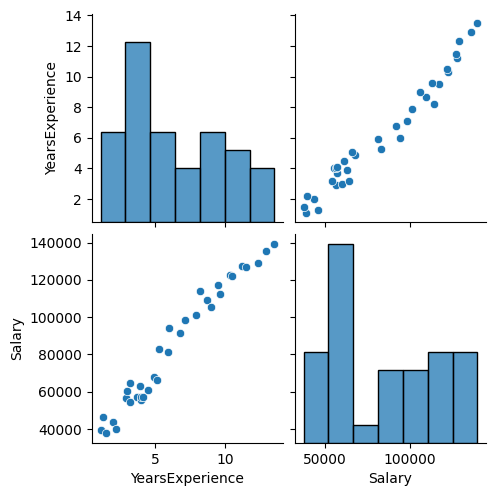

In [15]:
# Plot Pairplot (Variables Relationship)
sns.pairplot(salary_df)

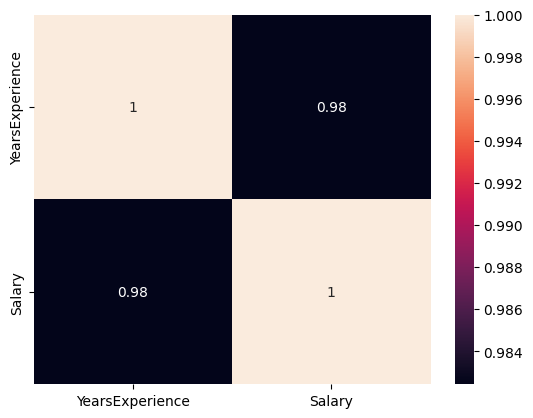

In [16]:
# Correlation Matrix
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

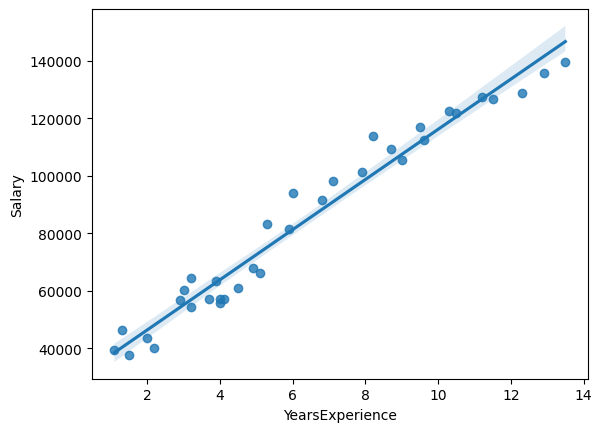

In [17]:
# Regression Plot with Seaborn (straight line fit between "salary" and "years of experience")
sns.regplot(x='YearsExperience',y='Salary',data=salary_df)

## 3) TRAINING AND TESTING DATA

In [18]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]

In [19]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [20]:
y

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891
5,56642
6,60150
7,54445
8,64445
9,57189


In [21]:
X.shape

(35, 1)

In [22]:
y.shape

(35, 1)

In [23]:
X = np.array(X)
y = np.array(y)

In [24]:
X.shape

(35, 1)

In [25]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=72)

In [26]:
X_train.shape

(26, 1)

In [27]:
X_test.shape

(9, 1)

In [28]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]
 [11.2]
 [11.5]
 [12.3]
 [12.9]
 [13.5]]


In [29]:
# We can see that data have been shuffled by "train_test_split
X_train

array([[ 8.2],
       [12.3],
       [ 2.2],
       [12.9],
       [ 1.5],
       [ 7.9],
       [ 5.3],
       [ 9. ],
       [ 1.1],
       [ 1.3],
       [13.5],
       [ 5.1],
       [ 3.2],
       [ 4. ],
       [ 4.1],
       [ 7.1],
       [ 3.2],
       [10.3],
       [ 9.5],
       [ 4.9],
       [11.5],
       [11.2],
       [ 2.9],
       [ 3.9],
       [ 6. ],
       [ 8.7]])

## 4) Train a Linear Regression Model

In [30]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression(fit_intercept = True) # Fit intercept is the "b" parameter (y = b + mx)
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# Checking the accuracy
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
mse

22525420.15503894

In [32]:
print('Linear Model Coefficient (m): ', lr.coef_)
print('Linear Model Coefficient (b): ', lr.intercept_)

Linear Model Coefficient (m):  [[8606.60865947]]
Linear Model Coefficient (b):  [30104.24003703]


## 5) EVALUATE TRAINED MODEL PERFORMANCE

In [33]:
y_pred

array([[ 68833.97900464],
       [ 61948.69207707],
       [120473.63096145],
       [ 64530.67467491],
       [112727.68316793],
       [ 55924.06601544],
       [ 88629.17892142],
       [ 80883.23112789],
       [ 47317.45735597]])

Text(0.5, 1.0, 'Salary vs. Years of Experience')

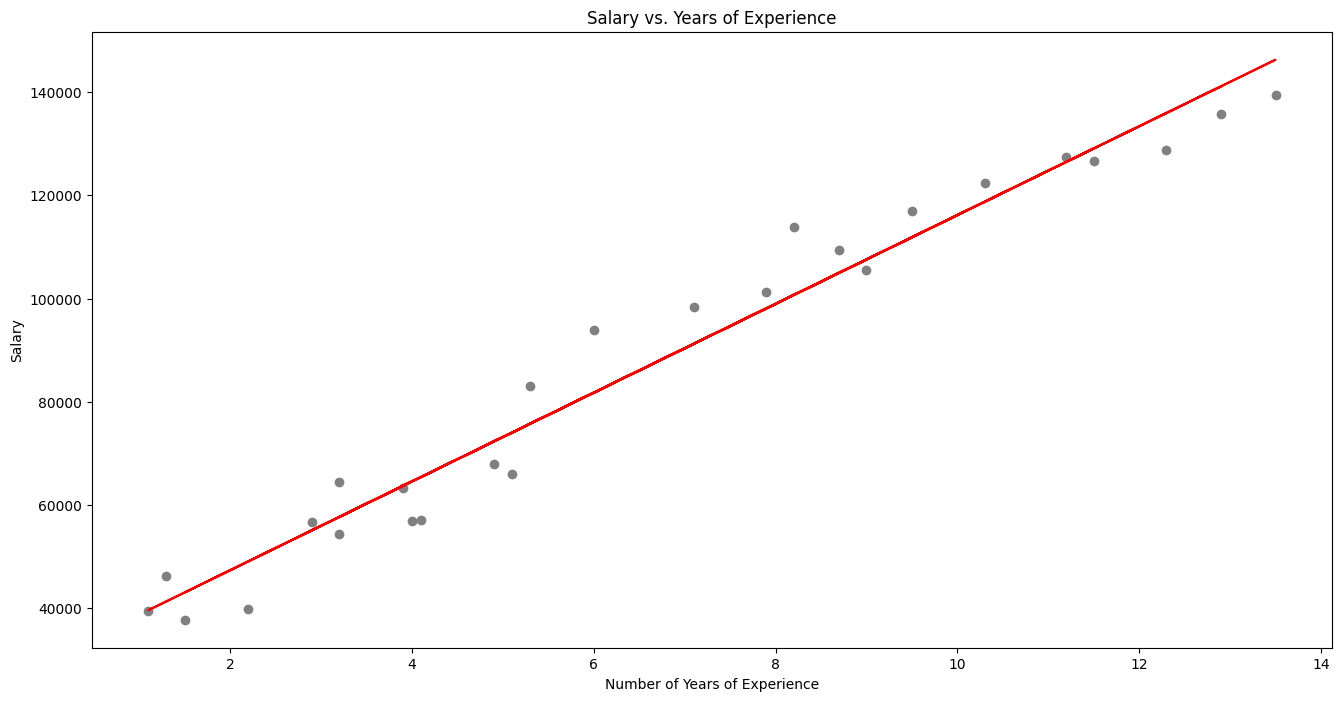

In [34]:
# Plotting the TRAIN DATA
plt.figure(figsize=(16,8))
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, lr.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

## 6) Making Predictions
 - Use the trained model to obtain the salary corresponding to eployees who have 5 years of experience

In [35]:
new_value = [[5.0]]
new_prediction = lr.predict(new_value)
new_prediction

array([[73137.28333437]])

## 7) Save the Model

In [36]:
import joblib

model_file = open("linear_regression_salary.pkl","wb")
joblib.dump(lr,model_file)
model_file.close()

In [37]:
files.download('linear_regression_salary.pkl')


NameError: name 'files' is not defined